In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None
# wczytanie zbioru uczącego - oficjalne mecze NBA z lat 1999-2019
raw_dataset = pd.read_csv('~/nba-dl/data/dataset/realtime-1999-2019.csv')
# wymiary zbioru danych - (wiersze, kolumny)
raw_dataset.shape

(24480, 23)

In [3]:
# wyświetlenie kilku przykładowych wierszy
raw_dataset.head()

,SEASON_ID,HOME_TEAM_NAME,AWAY_TEAM_NAME,GAME_ID,GAME_DATE,HWIN,HPLUSMINUS,HPO,APO,HGLW,...,HLH2HR,ALH2HR,HTFR,ATFR,HSWR,ASWR,HSPS,ASPS,HSPL,ASPL
0,21999,Charlotte Hornets,Toronto Raptors,29901035,2000-03-31,W,9.0,0.0625,0.0164,3,...,0.750000,0.250000,0.4,0.6,0.557,0.563,98.4,98.1,96.4,98.1
1,21999,Indiana Pacers,Denver Nuggets,29900860,2000-03-07,W,1.0,0.0909,0.0050,4,...,1.000000,0.000000,1.0,0.3,0.678,0.448,101.9,98.3,96.4,100.3
2,21999,New Jersey Nets,Cleveland Cavaliers,29901177,2000-04-19,L,-3.0,0.0244,0.0244,3,...,0.333333,0.666667,0.4,0.2,0.383,0.383,97.9,96.8,98.9,100.4
3,21999,Washington Wizards,New Jersey Nets,29900316,1999-12-16,W,4.0,0.0132,0.0244,3,...,0.400000,0.600000,0.2,0.1,0.261,0.273,91.5,94.9,99.0,99.0
4,21999,Utah Jazz,Miami Heat,29900502,2000-01-13,W,10.0,0.1111,0.1111,3,...,0.500000,0.500000,0.8,0.6,0.667,0.667,95.6,98.4,90.4,94.7


In [4]:
# stworzenie listy z numerycznymi danymi
columns = ['HWIN', 'HPO', 'APO', 'HGLW', 'AGLW', 'HLGR', 'ALGR', 'HLH2HR', 'ALH2HR', 'HTFR', 'ATFR',
           'HSWR', 'ASWR', 'HSPS', 'ASPS', 'HSPL', 'ASPL']

In [5]:
# stworzenie nowego zbioru na podstawie jedynie numerycznych danych
dataset = raw_dataset[columns]
dataset.head()

,HWIN,HPO,APO,HGLW,AGLW,HLGR,ALGR,HLH2HR,ALH2HR,HTFR,ATFR,HSWR,ASWR,HSPS,ASPS,HSPL,ASPL
0,W,0.0625,0.0164,3,4,0.6,0.5,0.750000,0.250000,0.4,0.6,0.557,0.563,98.4,98.1,96.4,98.1
1,W,0.0909,0.0050,4,3,0.7,0.5,1.000000,0.000000,1.0,0.3,0.678,0.448,101.9,98.3,96.4,100.3
2,L,0.0244,0.0244,3,4,0.0,0.3,0.333333,0.666667,0.4,0.2,0.383,0.383,97.9,96.8,98.9,100.4
3,W,0.0132,0.0244,3,3,0.2,0.4,0.400000,0.600000,0.2,0.1,0.261,0.273,91.5,94.9,99.0,99.0
4,W,0.1111,0.1111,3,3,0.7,0.7,0.500000,0.500000,0.8,0.6,0.667,0.667,95.6,98.4,90.4,94.7


In [6]:
# opis poszczególnych cech
dataset.describe()

,HPO,APO,HGLW,AGLW,HLGR,ALGR,HLH2HR,ALH2HR,HTFR,ATFR,HSWR,ASWR,HSPS,ASPS,HSPL,ASPL
count,24480.000000,24480.000000,24480.000000,24480.000000,24480.000000,24480.000000,24480.000000,24480.000000,24480.000000,24480.000000,24480.000000,24480.000000,24480.000000,24480.000000,24480.000000,24480.000000
mean,0.050087,0.050195,3.089992,3.159232,0.498985,0.504040,0.492886,0.505877,0.601276,0.400422,0.508164,0.511475,99.029130,99.099130,98.799579,98.765686
std,0.079119,0.079538,0.785733,0.782778,0.206875,0.206464,0.236571,0.236530,0.208461,0.199696,0.182740,0.182409,6.523804,6.501764,6.335122,6.329129
min,0.000400,0.000400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.000000,71.000000,67.000000,68.000000
25%,0.007900,0.007900,3.000000,3.000000,0.400000,0.400000,0.300000,0.300000,0.500000,0.300000,0.385000,0.389000,94.800000,94.800000,94.700000,94.600000
50%,0.019600,0.019600,3.000000,3.000000,0.500000,0.500000,0.500000,0.500000,0.600000,0.400000,0.515000,0.517000,98.500000,98.500000,98.400000,98.400000
75%,0.058800,0.058800,4.000000,4.000000,0.600000,0.700000,0.700000,0.700000,0.800000,0.500000,0.634000,0.636000,102.900000,103.000000,102.600000,102.600000
max,0.651600,0.651600,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,140.000000,130.000000,140.000000,136.000000


In [7]:
# mapowanie przewidywanej wielkości do wartości numerycznych
dataset['HWIN'] = dataset['HWIN'].map({'W': 1, 'L': 0})
dataset.head()
# podział zbioru uczącego na cechy(statystyki) oraz wielkość wyjściową(przewidywaną)
X = dataset.drop("HWIN", 1)
y = dataset["HWIN"]
# wykorzystane cechy
features = ['HPO', 'APO', 'HLGR', 'ALGR', 'HLH2HR', 'ALH2HR', 'HTFR', 'ATFR', 'HSWR', 'ASWR']
# stworzenie zbioru w oparciu o wybrane statystyki
X = X[features]
dim = len(features)

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

# stworzenie modelu sieci neuronowej
model = Sequential()
model.add(Dense(dim, input_dim=dim, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# standaryzacja zbioru uczącego
scaler = StandardScaler()
scaled_X= scaler.fit_transform(X)
# zakodowanie wartości wielkości wyjściowej numerycznie
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# konwersja do macierzy o liczbie kolumn równej liczbie możliwych wartości zmiennej wyjściowej
dummy_y = np_utils.to_categorical(encoded_Y)
# podział zbioru na dane treningowe i testowe z proporcją 9:1
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.1)

Using TensorFlow backend.


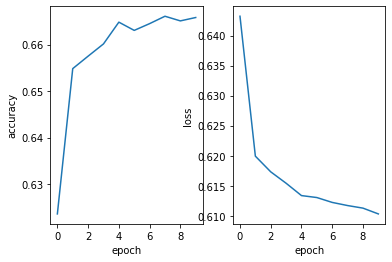

Skuteczność modelu na danych uczących: 66.58
Wartość funkcji kosztu na danych uczących: 0.61
Skuteczność modelu dla danych testowych: 65.48


In [9]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# rozpoczęcie procesu uczenia
history = model.fit(X_train, y_train, epochs=10, batch_size=500, verbose=0)
accuracy = history.history['accuracy'][-1] # zapisanie skuteczności do zmiennej accuracy
loss = history.history['loss'][-1]         # zapisanie wartości funkcji kosztu do zmiennej loss
# wykres skuteczności w kolejnych epokach
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
# wykres wartości funkcji kosztu w kolejnych epokach
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
print("Skuteczność modelu na danych uczących: {}".format(round(accuracy*100, 2)))
print("Wartość funkcji kosztu na danych uczących: {}".format(round(loss, 2)))
# sprawdzenie modelu z danymi testowymi
scores = model.evaluate(X_test, y_test, verbose=0)
validation = scores[1]                # zapisanie skuteczności do zmiennej validation
print("Skuteczność modelu dla danych testowych: {}".format(round(validation*100, 2)))

In [10]:
from keras.models import model_from_json
import os
import pickle

# zachowanie modelu do pliku typu JSON
model2json = model.to_json()
f = open(os.path.expanduser("~/nba-dl/models/model-2.json"), "w+")
f.write(model2json)
f.close()

# zapis wag do pliku
model.save_weights(os.path.expanduser('~/nba-dl/models/model-2-weights.h5'))

# zapis listy użytych cech przez model
with open(os.path.expanduser("~/nba-dl/models/model-2-features.pickle"), "wb+") as f:
    pickle.dump(features, f)